## Формирование датасетов

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 82
SAMPLE_SIZE = 100

In [3]:
# Функция для моделирования
def paint_drying_time(temperature, humidity):
    return 24 - 5.5 * temperature + 4.0 * humidity

In [4]:
# Создаем каталог data
if not os.path.exists('data'):
    os.makedirs('data')

In [5]:
np.random.seed(RANDOM_STATE)

# Температура воздуха
temperature = np.random.uniform(low=20, high=25, size=SAMPLE_SIZE)
# Влажность воздуха
humidity = np.random.uniform(low=40, high=80, size=SAMPLE_SIZE)
# Вычисляем время высыхания краски плюс шум
drying_time = paint_drying_time(temperature, humidity) + np.random.randn(SAMPLE_SIZE) + 2

### Основной датасет

In [6]:
# Набор данных с шумом только в целевой переменной
df = pd.DataFrame(
    data=np.array([temperature, humidity, drying_time]).T,
    columns=['temperature', 'humidity', 'time']
)

df.to_csv('data/data1.csv', index=False)

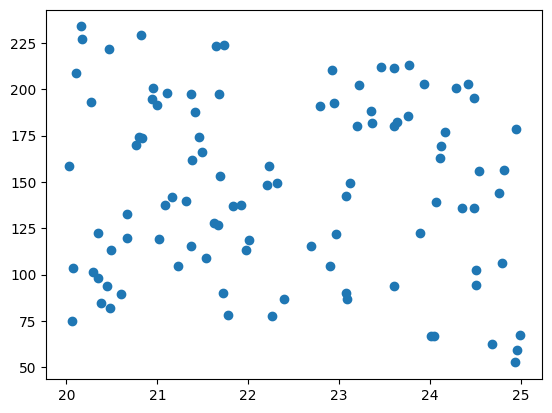

In [7]:
plt.scatter(x=df['temperature'], y=df['time'])

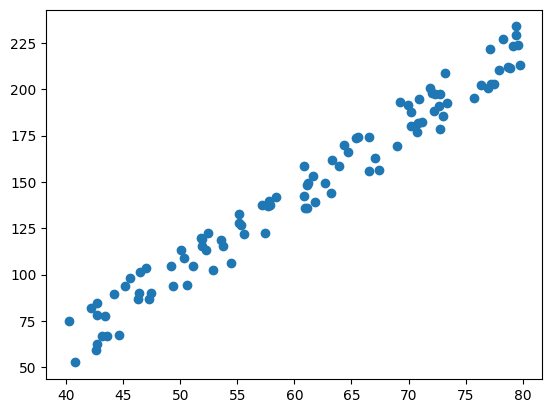

In [8]:
plt.scatter(x=df['humidity'], y=df['time'])

### Датасеты с шумами

In [9]:
# Добавим шум к температуре
temperature = temperature + 0.5 * np.random.randn(SAMPLE_SIZE) + 1
df = pd.DataFrame(
    data=np.array([temperature, humidity, drying_time]).T,
    columns=['temperature', 'humidity', 'time']
)

df.to_csv('data/data2.csv', index=False)

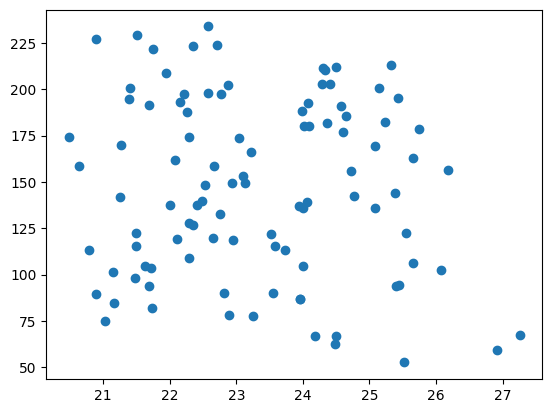

In [10]:
plt.scatter(x=df['temperature'], y=df['time'])

In [11]:
# Добавим выбросы
outliers = np.random.randint(low=10, high=SAMPLE_SIZE-10, size=5)
drying_time[outliers] = drying_time[outliers] * 2
drying_time[outliers-10] = drying_time[outliers-10] / 2

df = pd.DataFrame(
    data=np.array([temperature, humidity, drying_time]).T,
    columns=['temperature', 'humidity', 'time']
)

df.to_csv('data/data3.csv', index=False)

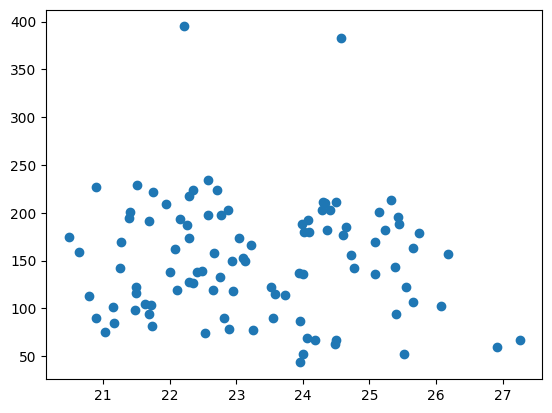

In [12]:
plt.scatter(x=df['temperature'], y=df['time'])

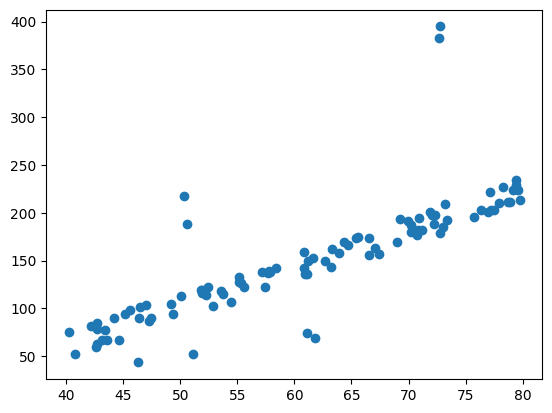

In [13]:
plt.scatter(x=df['humidity'], y=df['time'])

## Обучение модели

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Создаем модель линейной регрессии
model = LinearRegression()

df = pd.read_csv('data/data1.csv')
X = df.drop('time', axis=1)
y = df['time']

# Обучаем модель
model.fit(X, y)

LinearRegression()

## Тестирование

In [16]:
from sklearn.metrics import r2_score
import ipytest

In [17]:
ipytest.autoconfig()

In [18]:
def test_dataset2():
    # Загружаем второй набор данных
    test = pd.read_csv('data/data2.csv')
    X = test.drop('time', axis=1)
    y = test['time']

    # Получаем предсказание модели
    y_predict = model.predict(X)

    # Вычисляем значение метрики
    r2 = r2_score(y, y_predict)

    assert r2 >= 0.98

In [19]:
def test_dataset3():
    # Загружаем третий набор данных
    test = pd.read_csv('data/data3.csv')
    X = test.drop('time', axis=1)
    y = test['time']

    # Получаем предсказание модели
    y_predict = model.predict(X)

    # Вычисляем значение метрики
    r2 = r2_score(y, y_predict)

    assert r2 >= 0.98

### Запуск тестов модели

In [20]:
ipytest.run()

.F                                                                                           [100%]
============================================= FAILURES =============================================
__________________________________________ test_dataset3 ___________________________________________

    def test_dataset3():
        # Загружаем третий набор данных
        test = pd.read_csv('data/data3.csv')
        X = test.drop('time', axis=1)
        y = test['time']
    
        # Получаем предсказание модели
        y_predict = model.predict(X)
    
        # Вычисляем значение метрики
        r2 = r2_score(y, y_predict)
    
>       assert r2 >= 0.98
E       assert 0.6701737480854264 >= 0.98

/var/folders/l1/js0r2y_x3mx27bqfyw1j0rl40000gn/T/ipykernel_37704/2691078600.py:13: AssertionError
===================================== short test summary info ======================================
FAILED t_7cc94dc3c1dc4862a1c4f70502b39912.py::test_dataset3 - assert 0.6701737480854264 >= 0

<ExitCode.TESTS_FAILED: 1>